In [363]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif, f_regression
from sklearn import preprocessing

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

from sklearn.metrics import accuracy_score, confusion_matrix



In [454]:
props = pd.read_csv('../data/curated/places_property.csv')
external = pd.read_csv('../data/curated/Property_external.csv')

In [455]:
props

,Address,Suburb,Prices,Type_Apartment,Type_House,Type_Townhouse,Estimated resident population (no.),Population density (persons/km2),Median age - persons (years),Working age population (aged 15-64 years) (no.),...,"Used at least one form of public transport (train, tram, bus, ferry) (no.)",Extracted_Address,latitude,longitude,num_stops,num_stations,num_schools,num_landmarks,distance to CBD,total_transport
0,"39 Durham Crescent, \nHOPPERS CROSSING VIC 3029",HOPPERS CROSSING,450.0,0,1,0,37666.0,4420.4,74.1,25272.0,...,884.0,"39 Durham Crescent, \nHOPPERS CROSSING VIC 3029",-37.872563,144.686795,0.0,0.0,14.0,0.0,45.1,0.0
1,"7/1 Mabel Street, \nIVANHOE VIC 3079",IVANHOE,450.0,0,0,1,12561.0,2487.4,40.9,8357.0,...,343.0,"1 Mabel Street, \nIVANHOE VIC 3079",-37.761896,145.029437,0.0,0.0,19.0,0.0,8.7,0.0
2,"2/59 Green Street, \nIVANHOE VIC 3079",IVANHOE,450.0,1,0,0,12561.0,2487.4,40.9,8357.0,...,343.0,"59 Green Street, \nIVANHOE VIC 3079",-37.764732,145.035655,0.0,0.0,25.0,0.0,7.8,0.0
3,"104/15 Ivanhoe Parade, \nIVANHOE VIC 3079",IVANHOE,450.0,1,0,0,12561.0,2487.4,40.9,8357.0,...,343.0,"15 Ivanhoe Parade, \nIVANHOE VIC 3079",-37.767678,145.045093,0.0,1.0,21.0,0.0,8.5,1.0
4,"63 Dunne Street, \nKINGSBURY VIC 3083",KINGSBURY,450.0,0,1,0,10564.0,1172.6,34.0,7808.0,...,382.0,"63 Dunne Street, \nKINGSBURY VIC 3083",-37.714056,145.037364,1.0,0.0,19.0,0.0,12.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,"156 Black Forest Road, \nWYNDHAM VALE VIC 3024",WYNDHAM VALE,465.0,0,1,0,22858.0,2941.3,63.4,15428.0,...,651.0,"156 Black Forest Road, \nWYNDHAM VALE VIC 3024",-37.899498,144.609698,0.0,0.0,7.0,0.0,57.7,0.0
4198,"104/118 Pier Street, \nALTONA VIC 3018",ALTONA,470.0,1,0,0,28738.0,1704.2,78.8,18016.0,...,600.0,"118 Pier Street, \nALTONA VIC 3018",-37.868826,144.830352,0.0,1.0,5.0,0.0,22.5,1.0
4199,"2/35 Ailsa Street, \nALTONA MEADOWS VIC 3028",ALTONA MEADOWS,470.0,0,1,0,18665.0,1770.6,40.9,12311.0,...,380.0,"35 Ailsa Street, \nALTONA MEADOWS VIC 3028",-37.870238,144.762616,0.0,1.0,0.0,0.0,38.5,1.0
4200,"6 Stringybark Court, \nBERWICK VIC 3806",BERWICK,470.0,0,1,0,23187.0,1174.1,43.3,14432.0,...,241.0,"6 Stringybark Court, \nBERWICK VIC 3806",-38.026246,145.324107,0.0,0.0,0.0,0.0,56.5,0.0


In [456]:
store = list(props['Address'])

In [457]:
filtered_df = external[external['Address'].isin(store)]
filtered_df = filtered_df.reset_index(drop=True)

In [458]:
a = filtered_df['Address']
a = a.reset_index(drop=True)
b = props['Address']
a.equals(b)

True

In [466]:
bedroom = filtered_df['Bedroom']
bathroom = filtered_df['Bathroom']
parking = filtered_df['Parking']
med = filtered_df['Median equivalised total household income (weekly) ($)']

In [467]:
props['Bedroom'] = bedroom
props['Bathroom'] = bathroom
props['Parking'] = parking
props['Median equivalised total household income (weekly) ($)'] = med

In [468]:
props['Bedroom'] = props['Bedroom'].replace([' '], '0')
props['Bathroom'] = props['Bathroom'].replace([' '], '0')
props['Parking'] = props['Parking'].replace([' '], '0')
props['Bedroom'] = props['Bedroom'].astype(int)
props['Bathroom'] = props['Bathroom'].astype(int)
props['Parking'] = props['Parking'].astype(int)

In [469]:
props.to_csv('../data/curated/complete_dataset.csv')

In [470]:
len(props)

4202

In [471]:
props.columns

Index(['Address', 'Suburb', 'Prices', 'Type_Apartment', 'Type_House',
       'Type_Townhouse', 'Estimated resident population (no.)',
       'Population density (persons/km2)', 'Median age - persons (years)',
       'Working age population (aged 15-64 years) (no.)', 'Employed (no.)',
       'Unemployed (no.)', 'Renter (no.)',
       'Health care and social assistance (no.)',
       'Financial and insurance services (no.)',
       'Administrative and support services (no.)',
       'Education and training (no.)', 'Accommodation and food services (no.)',
       'Public administration and safety (no.)',
       'Value of residential building ($m)', 'Houses - total (no.)',
       'Townhouses - total (no.)', 'Apartments - total (no.)',
       'Median weekly household rental payment ($)', 'Rented (no.)',
       'Count of homeless persons (no.)',
       'Used at least one form of public transport (train, tram, bus, ferry) (no.)',
       'Extracted_Address', 'latitude', 'longitude', 'num_stops'

In [472]:
features = [
    'Type_Apartment', 'Type_House',
       'Type_Townhouse', 'Estimated resident population (no.)',
       'Population density (persons/km2)', 'Median age - persons (years)',
       'Working age population (aged 15-64 years) (no.)', 'Renter (no.)',
       'Health care and social assistance (no.)',
       'Financial and insurance services (no.)',
       'Administrative and support services (no.)',
       'Education and training (no.)', 'Accommodation and food services (no.)',
       'Public administration and safety (no.)',
       'Value of residential building ($m)', 'Houses - total (no.)',
       'Townhouses - total (no.)', 'Apartments - total (no.)',
       'Median weekly household rental payment ($)', 'Rented (no.)',
       'Count of homeless persons (no.)',
       'Used at least one form of public transport (train, tram, bus, ferry) (no.)',
       'total_transport', 'num_schools', 'num_landmarks', 'distance to CBD',
       'Bedroom', 'Bathroom', 'Parking',
       'Median equivalised total household income (weekly) ($)'
       ]

props['Prices'] = props['Prices'].astype(float)
X = props[features]
y= props['Prices']


In [473]:
X.dtypes

Type_Apartment                                                                  int64
Type_House                                                                      int64
Type_Townhouse                                                                  int64
Estimated resident population (no.)                                           float64
Population density (persons/km2)                                              float64
Median age - persons (years)                                                  float64
Working age population (aged 15-64 years) (no.)                               float64
Renter (no.)                                                                  float64
Health care and social assistance (no.)                                       float64
Financial and insurance services (no.)                                        float64
Administrative and support services (no.)                                     float64
Education and training (no.)                          

In [475]:
X = X[X['Bedroom'] != 0]

In [476]:
len(features)

30

<Axes: >

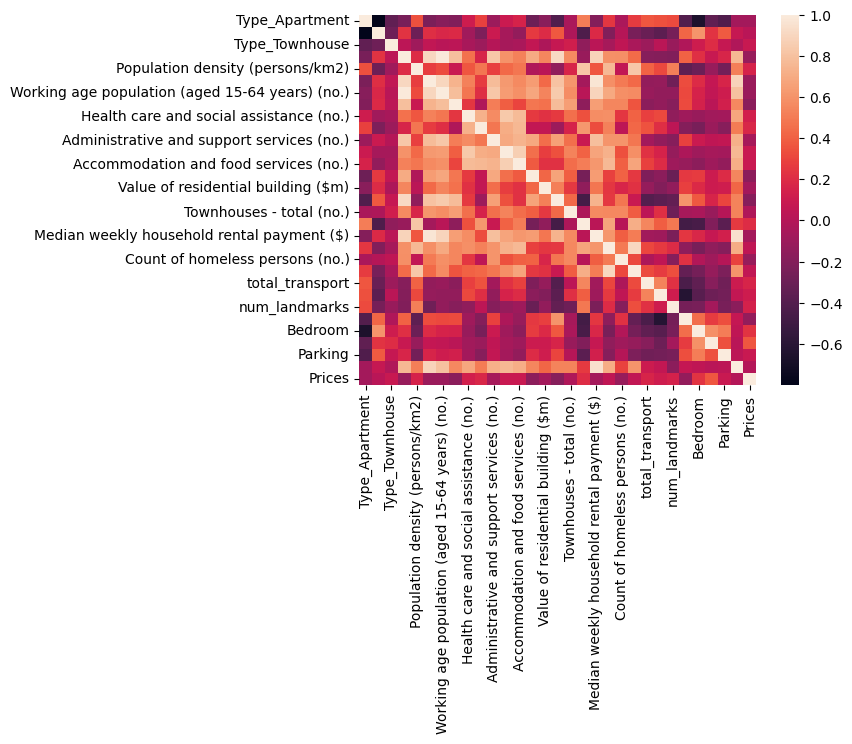

In [477]:
heatmap_features = features.copy()
heatmap_features.append('Prices')

heatmap_data = props[heatmap_features]
sns.heatmap(heatmap_data.corr())

In [478]:
len(features)

30

In [389]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

In [678]:
import statsmodels.api as sm
import pandas as pd

props['Prices'] = props['Prices'].astype(float)
X = props[features]
y = props['Prices']

# Perform stepwise selection with AIC
def stepwise_selection(X, y):
    predictors = X.columns.tolist()
    selected = []
    current_aic = float('inf')  # Initialize with a high value

    while predictors:
        aic_with_candidates = []
        for predictor in predictors:
            model = sm.OLS(y, sm.add_constant(X[selected + [predictor]])).fit()
            aic = model.aic
            aic_with_candidates.append((aic, predictor))

        aic_with_candidates.sort(reverse=True)
        best_aic, best_predictor = aic_with_candidates.pop()

        if best_aic < current_aic:
            current_aic = best_aic
            selected.append(best_predictor)
        else:
            break

    return selected

selected_predictors = stepwise_selection(X, y)
print("Selected predictors:", selected_predictors)

Selected predictors: ['Bathroom', 'Apartments - total (no.)', 'Bedroom', 'Houses - total (no.)', 'Health care and social assistance (no.)', 'Public administration and safety (no.)', 'Townhouses - total (no.)', 'num_landmarks', 'Rented (no.)', 'Median age - persons (years)', 'num_schools', 'Type_Apartment', 'Administrative and support services (no.)', 'distance to CBD', 'Used at least one form of public transport (train, tram, bus, ferry) (no.)', 'Count of homeless persons (no.)', 'Financial and insurance services (no.)', 'Accommodation and food services (no.)', 'Working age population (aged 15-64 years) (no.)', 'Parking', 'total_transport', 'Median weekly household rental payment ($)']


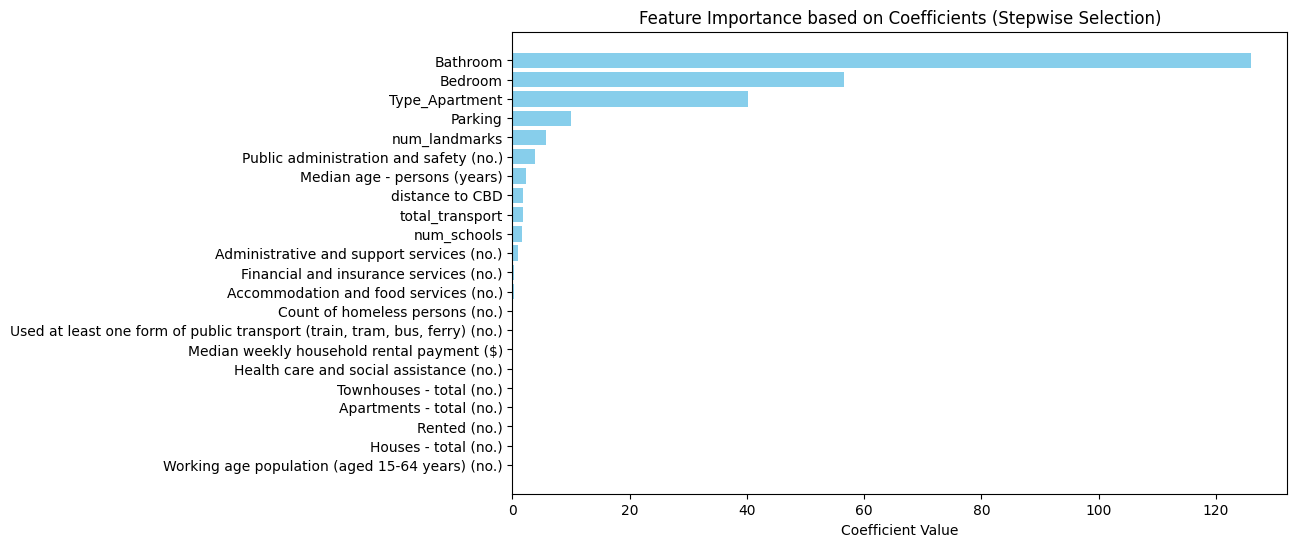

In [681]:
import matplotlib.pyplot as plt

# Fit a linear regression model with the selected predictors
X_selected = X[selected_predictors]
X_selected = sm.add_constant(X_selected)  # Add a constant for the intercept
model = sm.OLS(y, X_selected).fit()

# Get the coefficients of the selected predictors
coefficients = abs(model.params)

# Sort the coefficients in descending order
coefficients = coefficients.sort_values(ascending=False)[1:]

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(coefficients.index, coefficients.values, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance based on Coefficients (Stepwise Selection)')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()


In [633]:
selected_predictors

['Bathroom',
 'Apartments - total (no.)',
 'Bedroom',
 'Houses - total (no.)',
 'Health care and social assistance (no.)',
 'Public administration and safety (no.)',
 'Townhouses - total (no.)',
 'num_landmarks',
 'Rented (no.)',
 'Median age - persons (years)',
 'num_schools',
 'Type_Apartment',
 'Administrative and support services (no.)',
 'distance to CBD',
 'Used at least one form of public transport (train, tram, bus, ferry) (no.)',
 'Count of homeless persons (no.)',
 'Financial and insurance services (no.)',
 'Accommodation and food services (no.)',
 'Working age population (aged 15-64 years) (no.)',
 'Parking',
 'total_transport',
 'Median weekly household rental payment ($)']

In [684]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a list of alpha values to search (regularization strength)
alphas = np.logspace(-4, 4, 100)

# Initialize LassoCV with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)  # You can adjust the number of cross-validation folds (cv) as needed

# Fit the LassoCV model to your data
lasso_cv.fit(X, y)

# Get the optimal alpha value chosen by cross-validation
optimal_alpha = lasso_cv.alpha_
print(f"Optimal Alpha: {optimal_alpha}")

# Get the selected features (coefficients) from the Lasso model
selected_features = X.columns[lasso_cv.coef_ != 0]

# Evaluate the performance of the selected features using cross-validation
cross_val_scores = cross_val_score(lasso_cv, X[selected_features], y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean squared error (MSE) from the cross-validation scores
mse = -np.mean(cross_val_scores)

# Print the selected features and MSE
print(f"Selected Features: {selected_features}")


Optimal Alpha: 1.0974987654930568


/Users/clardelia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.732e+07, tolerance: 1.210e+04
  model = cd_fast.enet_coordinate_descent(
/Users/clardelia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.163e+07, tolerance: 1.636e+04
  model = cd_fast.enet_coordinate_descent(
/Users/clardelia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

Selected Features: Index(['Type_Apartment', 'Estimated resident population (no.)',
       'Population density (persons/km2)', 'Median age - persons (years)',
       'Working age population (aged 15-64 years) (no.)', 'Renter (no.)',
       'Health care and social assistance (no.)',
       'Financial and insurance services (no.)',
       'Administrative and support services (no.)',
       'Accommodation and food services (no.)',
       'Public administration and safety (no.)',
       'Value of residential building ($m)', 'Houses - total (no.)',
       'Townhouses - total (no.)', 'Apartments - total (no.)',
       'Median weekly household rental payment ($)', 'Rented (no.)',
       'Count of homeless persons (no.)',
       'Used at least one form of public transport (train, tram, bus, ferry) (no.)',
       'total_transport', 'num_schools', 'num_landmarks', 'distance to CBD',
       'Bedroom', 'Bathroom', 'Parking',
       'Median equivalised total household income (weekly) ($)'],
      dt

/Users/clardelia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.484e+07, tolerance: 1.723e+04
  model = cd_fast.enet_coordinate_descent(


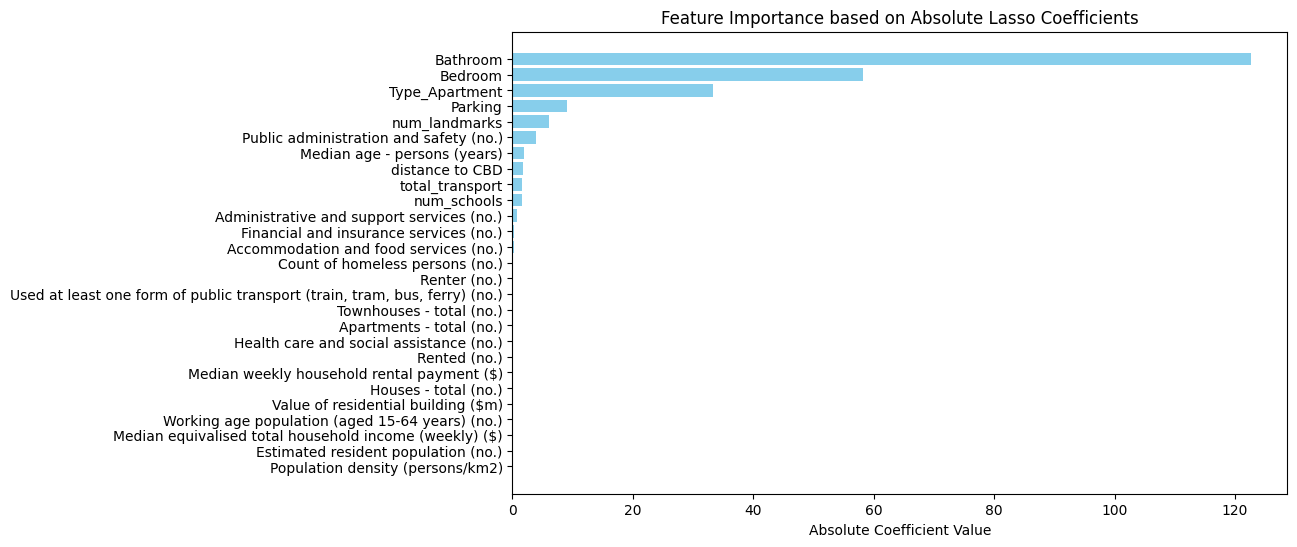

In [685]:
import matplotlib.pyplot as plt

# Get the coefficients of the selected features
coefficients = lasso_cv.coef_

# Take the absolute values of the coefficients
abs_coefficients = np.abs(coefficients)

# Create a DataFrame to store feature names and their absolute coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Absolute Coefficient': abs_coefficients})

# Filter the DataFrame to include only the selected features
coef_df = coef_df[coef_df['Feature'].isin(selected_features)]

# Sort the DataFrame by absolute coefficient values in descending order
coef_df = coef_df.reindex(coef_df['Absolute Coefficient'].sort_values(ascending=False).index)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Absolute Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance based on Absolute Lasso Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()

In [635]:
important_f = []
for feature in selected_features:
    if feature in selected_predictors:
        important_f.append(feature)

In [636]:
len(important_f)

22

In [686]:
important_f

['Type_Apartment',
 'Median age - persons (years)',
 'Working age population (aged 15-64 years) (no.)',
 'Health care and social assistance (no.)',
 'Financial and insurance services (no.)',
 'Administrative and support services (no.)',
 'Accommodation and food services (no.)',
 'Public administration and safety (no.)',
 'Houses - total (no.)',
 'Townhouses - total (no.)',
 'Apartments - total (no.)',
 'Median weekly household rental payment ($)',
 'Rented (no.)',
 'Count of homeless persons (no.)',
 'Used at least one form of public transport (train, tram, bus, ferry) (no.)',
 'total_transport',
 'num_schools',
 'num_landmarks',
 'distance to CBD',
 'Bedroom',
 'Bathroom',
 'Parking']

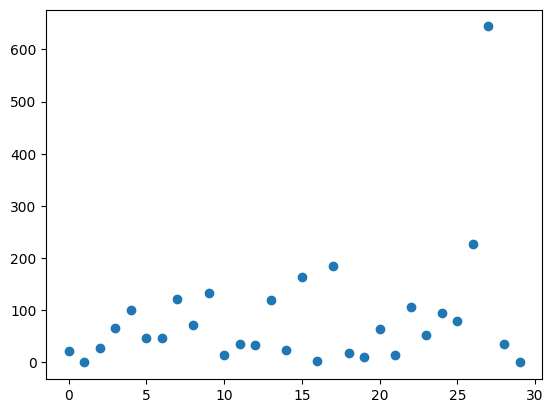

In [638]:
test = SelectKBest(score_func=f_regression, k=30)
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
i= range(len(features))
plt.scatter(i, fit.scores_)

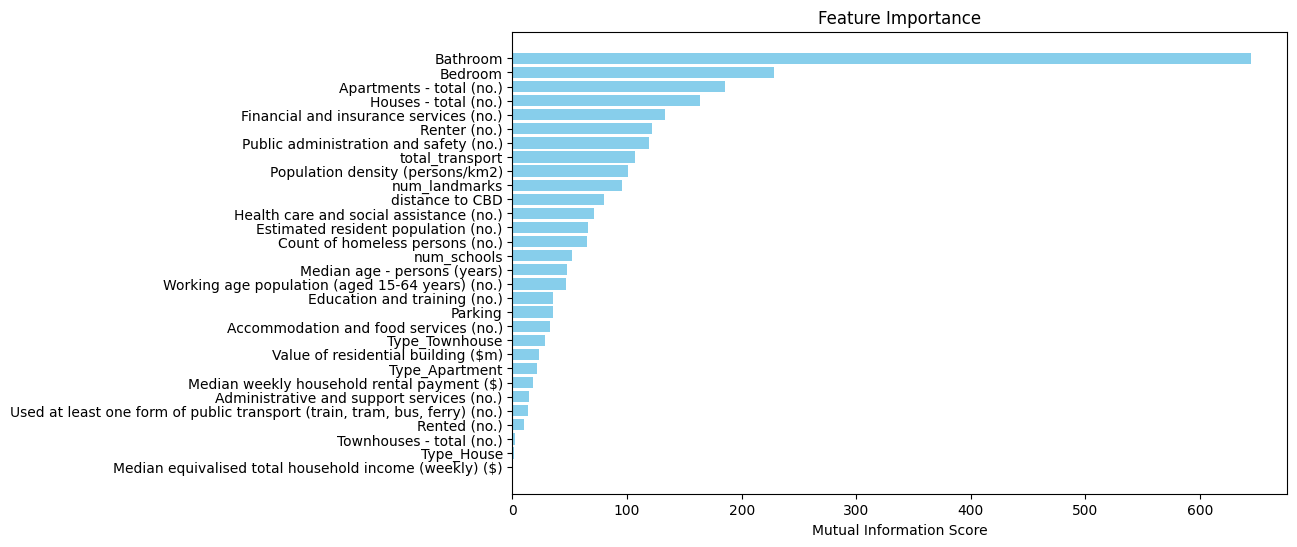

In [639]:
# Sort the features based on their importance scores
sorted_features = [x for _, x in sorted(zip(fit.scores_, features), reverse=True)]

# Sort the feature scores accordingly
sorted_scores = sorted(fit.scores_, reverse=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_scores, color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

In [668]:
#SO take the best k = 23, since 6 clearly are not good
test = SelectKBest(score_func=mutual_info_regression, k=22)
fit = test.fit(X, y)

new_features = fit.transform(X)

new_features.shape

mask = fit.get_support() #list of booleans
best_features = [] # The list of your K best features

for bool_val, feature in zip(mask, features):
    if bool_val:
        best_features.append(feature)

best_features

['Estimated resident population (no.)',
 'Population density (persons/km2)',
 'Median age - persons (years)',
 'Working age population (aged 15-64 years) (no.)',
 'Renter (no.)',
 'Health care and social assistance (no.)',
 'Financial and insurance services (no.)',
 'Administrative and support services (no.)',
 'Education and training (no.)',
 'Accommodation and food services (no.)',
 'Value of residential building ($m)',
 'Houses - total (no.)',
 'Townhouses - total (no.)',
 'Apartments - total (no.)',
 'Median weekly household rental payment ($)',
 'Rented (no.)',
 'Count of homeless persons (no.)',
 'Used at least one form of public transport (train, tram, bus, ferry) (no.)',
 'distance to CBD',
 'Bedroom',
 'Bathroom',
 'Median equivalised total household income (weekly) ($)']

In [669]:
X_new = X[best_features]

In [670]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mae, mse, rmse, r2)

96.21283843188208 26863.127738031206 163.8997490481032 0.34509934869198466


In [330]:
rfc  = RandomForestClassifier(max_depth= 6, max_features='sqrt', n_estimators=300, random_state=18).fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('Model accuracy score with 300 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 300 decision-trees : 0.1177


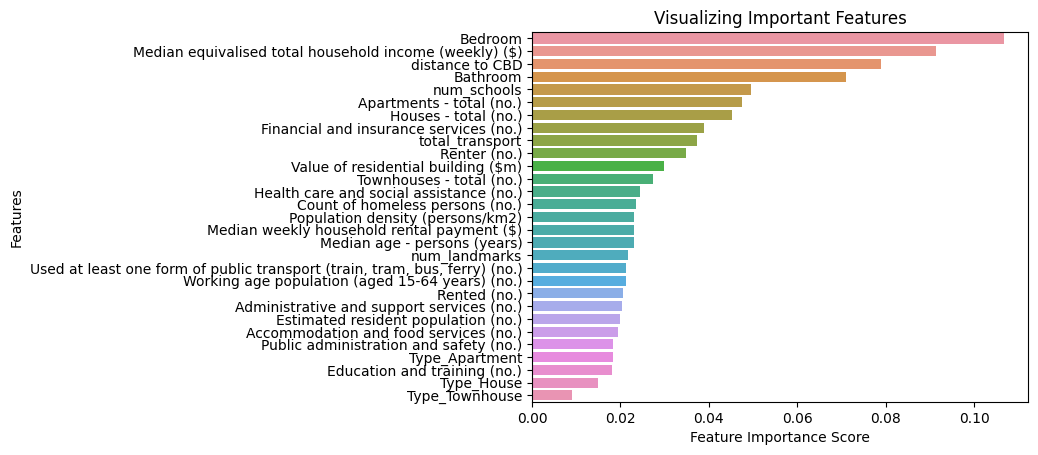

<Figure size 640x480 with 0 Axes>

In [331]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()
plt.savefig('visualising_important_features')

In [350]:
len(X.columns)

29

In [352]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = props[features]
y= y_encoded

# Define a range of k values to evaluate
k_values = range(1, len(X.columns) + 1)

best_k = None
best_score = -1

# Loop through different k values and evaluate model performance
for k in k_values:
    # Perform ANOVA feature selection
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(X, y)
    
    # Create a classifier (e.g., Random Forest) and compute cross-validation score
    clf = RandomForestClassifier()
    scores = cross_val_score(clf, X_new, y, cv=5)  # 5-fold cross-validation
    
    # Calculate the mean score across folds
    mean_score = scores.mean()
    
    # Check if this k results in a better score
    if mean_score > best_score:
        best_score = mean_score
        best_k = k

print("Best k:", best_k)
print("Best cross-validation score:", best_score)


/Users/clardelia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/clardelia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/clardelia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/clardelia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/clardelia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members

KeyboardInterrupt: 

KMEANS

[0.5726917648655788, 0.5202221721129836, 0.454480209431743, 0.45294757228478744, 0.33754988760653093, 0.32592774902429356, 0.3392678445627228, 0.3477942085431154, 0.348420050131934, 0.33273707843024164, 0.33475784427016736, 0.3369493473367571, 0.3474193148320512]


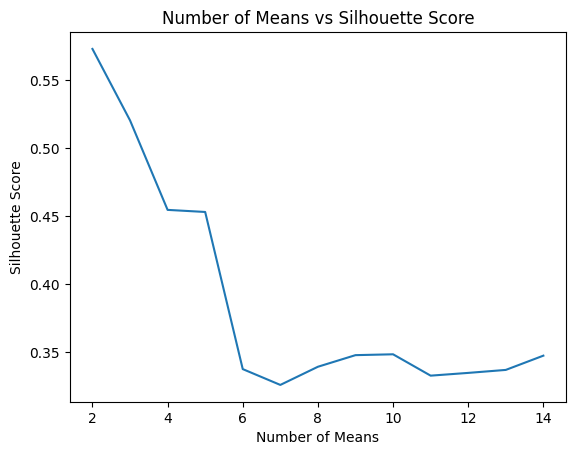

In [338]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20037)

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

K = range(2, 15)
fits = []
score = []

for k in K:
    # train the model for the current value of k on training data
    model = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

print(score)

sns.lineplot(x=K, y=score).set(title='Number of Means vs Silhouette Score', xlabel='Number of Means', ylabel='Silhouette Score')
plt.savefig('Silhouette Score')
# Lower the better for the score


0.3392678445627228


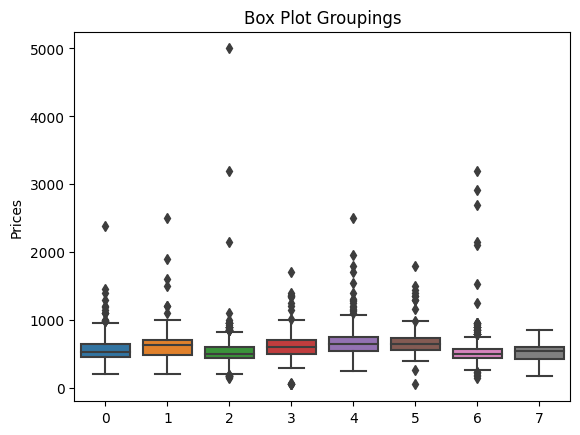

In [340]:
kmeans = KMeans(n_clusters=8, random_state=0, n_init=10)
kmeans.fit(X_train_norm)

print(silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean'))


sns.boxplot(x = kmeans.labels_, y = y_train).set(title = 'Box Plot Groupings')
plt.savefig('Price Box Plots')